In [1]:
import geopandas
import numpy
import numpy
import math
import shapely
import plots
import matplotlib.pyplot as plt

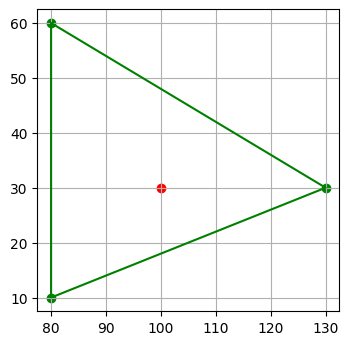

In [2]:
fig, ax = plt.subplots(dpi=100)
ax.grid(True)

poly = []
point = numpy.array([100, 30])

node1 = numpy.array([80, 10])
node2 = numpy.array([130, 30])
node3 = numpy.array([80, 60])
node4 = numpy.array([80, 10])

poly.append(shapely.geometry.LineString([node1, node2, node3, node4]))
poly.append(shapely.geometry.Point(node1))
poly.append(shapely.geometry.Point(node2))
poly.append(shapely.geometry.Point(node3))

geopandas.GeoDataFrame({'geom': poly}).set_geometry('geom').plot(ax=ax, color='green')
geopandas.GeoDataFrame({'geom': [shapely.geometry.Point(point)]}).set_geometry('geom').plot(ax=ax, color='red')

In [3]:
def to_ecef(lon, lat):
    x = numpy.cos(lon/360*math.pi*2) * numpy.cos(lat/360*math.pi*2)
    y = numpy.sin(lon/360*math.pi*2) * numpy.cos(lat/360*math.pi*2)
    z = numpy.sin(lat/360*math.pi*2)
    return x, y, z

point_ecef = to_ecef(point[0], point[1])

node1_ecef = to_ecef(node1[0], node1[1])
node2_ecef = to_ecef(node2[0], node2[1])
node3_ecef = to_ecef(node3[0], node3[1])
node4_ecef = to_ecef(node4[0], node4[1])

edge1 = numpy.cross(node1_ecef, node2_ecef)
edge2 = numpy.cross(node2_ecef, node3_ecef)
edge3 = numpy.cross(node3_ecef, node4_ecef)


<IPython.core.display.Javascript object>


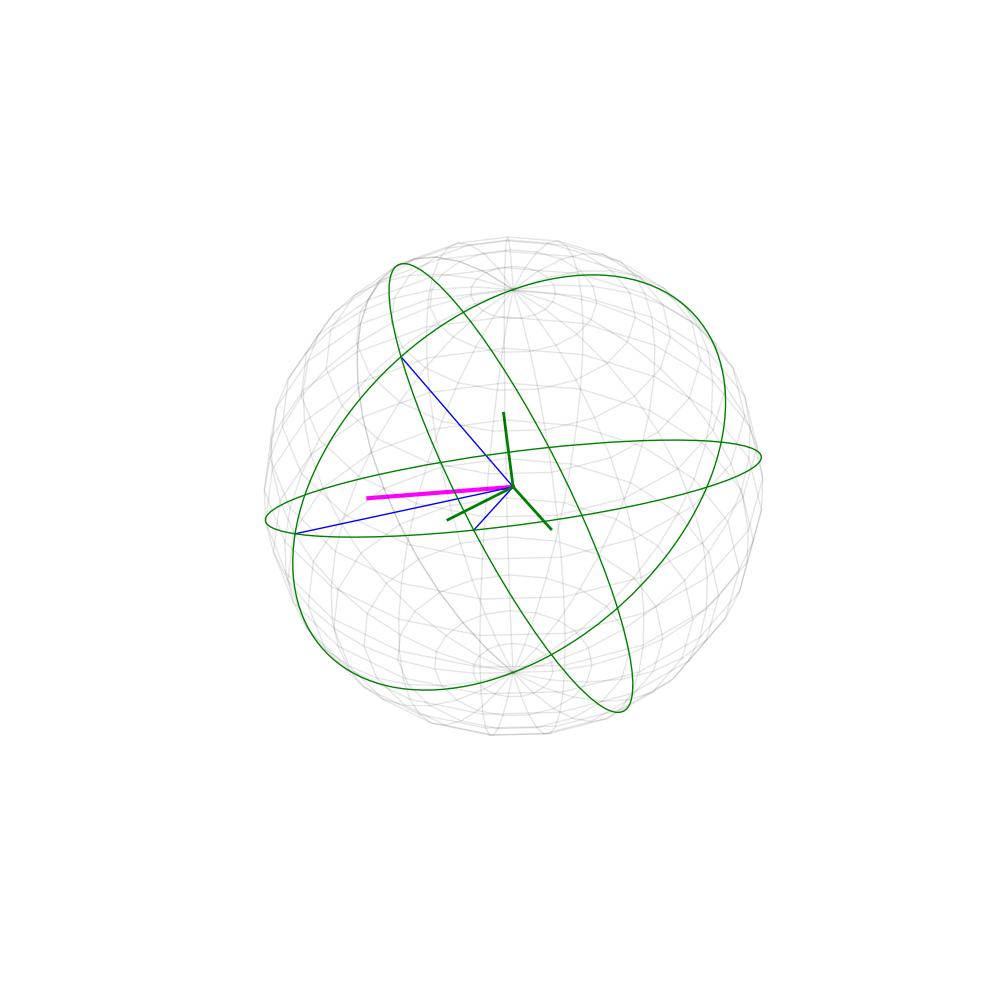

(-1.586824088833465,
 0.41317591116653496,
 -0.5075961234938959,
 1.492403876506104)

In [5]:
%matplotlib notebook
plot = plots.SpherePlot(radius=1)

plot.plot_great_circle(axis=edge1, radius=1, fill=False, linewidth=1, alpha=1, color='green')
plot.plot_great_circle(axis=edge2, radius=1, fill=False, linewidth=1, alpha=1, color='green')
plot.plot_great_circle(axis=edge3, radius=1, fill=False, linewidth=1, alpha=1, color='green')

plot.plot_nvector(point_ecef, color='magenta',  linewidth=3)
plot.plot_nvector(node1_ecef, color='blue', linewidth=1)
plot.plot_nvector(node2_ecef, color='blue', linewidth=1)
plot.plot_nvector(node3_ecef, color='blue', linewidth=1)

plot.plot_nvector(edge1, color='green', linewidth=2, scale=0.3)
plot.plot_nvector(edge2, color='green', linewidth=2, scale=0.3)
plot.plot_nvector(edge3, color='green', linewidth=2, scale=0.3)
plot.make_sphere(wire=True, only_north=False, only_front=False,  alpha=0.1)
plot.zoom_to(point[1]+10, point[0]+40, 1, set_azimuth=True)

#plot.make_gc_divider(point_ecef, color='white')

plot.ax.axis('off')